#   Task 3: 💻 Pizza sales analysis

## Loading of the four CSV files

In [27]:
import pandas as pd # importing pandas

import matplotlib.pyplot as plt # importing matplotlib

import seaborn as sns # importing seasborn as sns

sns.set(style="whitegrid")

orders = pd.read_csv('orders.csv') # importing four csv files
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1') 

In [2]:
orders.head() # preview of orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [3]:
order_details.head() # preview of order details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
pizzas.head() # preview of pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [5]:
pizza_types.head() # preview of pizza types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## 🔗 Merging of the datasets

In [6]:
# Merging order_details with pizzas to get price
details_prices = pd.merge(order_details, pizzas, on="pizza_id")

# Merging with orders to get order date/time
full_data = pd.merge(details_prices, orders, on="order_id")

# Merge with pizza_types to get pizza category and ingredients
full_data = pd.merge(full_data, pizza_types, on="pizza_type_id") 

# convert date/time columns
full_data["data"] = pd.to_datetime(full_data["date"])
full_data["time"] = pd.to_datetime(full_data["time"], format="%H:%M:%S").dt.time

In [7]:
full_data.head() # confriming the merged datasets

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients,data
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01


In [8]:
full_data.duplicated().sum() # checking for duplicates

0

In [9]:
full_data.info() # confirming appropriate data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   date              48620 non-null  object        
 8   time              48620 non-null  object        
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  data              48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 4.8+ MB


# Recommended analysis answers

## 1.Total revenue/sales

In [10]:
full_data["revenue"] = full_data["price"] * full_data["quantity"]
total_revenue = full_data["revenue"].sum()
total_revenue

817860.05

#### Insight: The total revenue generated over the year is $817860.05, indicating the overall financial performance of the pizza place

## 2.Total quantity sold

In [11]:
total_quantity = full_data["quantity"].sum()
total_quantity

49574

#### Insight: A total of 49574 pizzas were sold throughout the year, reflecting strong customer demand.

## 3.Total number of orders

In [12]:
total_orders = full_data["order_id"].nunique()
total_orders

21350

#### Insight: A total of 21,350 orders were placed throughtout the year.

## 4.Number of pizza types

In [13]:
pizza_types_count = full_data["pizza_type_id"].nunique()
pizza_types_count

32

#### Insight: The menu consists of 32 different pizza types, offering a good variety for customer preferences

## 5.Average price  

In [14]:
average_price = full_data["price"].mean()
average_price 

16.494132044426163

#### Insight: The average price of a pizza is around $16.49, suggesting mid-range pricing that is likely affordable for many customers.

## 6. Peak sales hours 

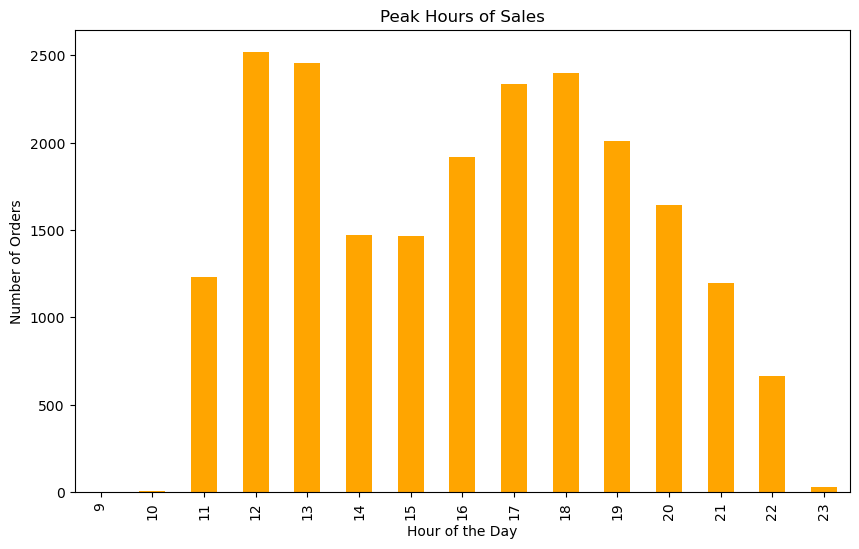

In [17]:
# converting time and extracting hour
orders["time"] = pd.to_datetime(orders["time"], format="%H:%M:%S")
orders["hour"] = orders["time"].dt.hour

# plot
plt.figure(figsize=(10, 6)) # size of the chart
orders["hour"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Peak Hours of Sales")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")

plt.show()

#### Insight:
#### Sales peaked between 12 PM and 1 PM, showing lunch hours are the busiest. 

## 7. Sales by day of the week

In [18]:
# Convert 'date' column to datetime if it isn't already
full_data['date'] = pd.to_datetime(full_data['date'])

# Extract day of the week
full_data["day_of_week"] = full_data["date"].dt.day_name()

# Group and analyze sales by day
full_data.groupby("day_of_week")["revenue"].sum().sort_values(ascending=False).reset_index()


,day_of_week,revenue
0,Friday,136073.90
1,Thursday,123528.50
2,Saturday,123182.40
3,Wednesday,114408.40
4,Tuesday,114133.80
5,Monday,107329.55
6,Sunday,99203.50


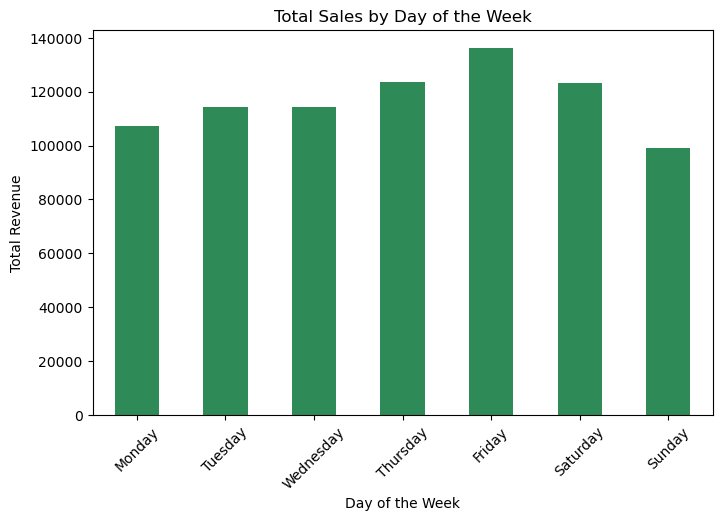

In [19]:
# plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = full_data.groupby("day_of_week")["revenue"].sum().reindex(day_order)
sales_by_day.plot(kind="bar", color="seagreen", figsize=(8,5))
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

plt.show()

In [20]:
# day of the week with the most sales
total_sales_by_day = full_data.groupby("day_of_week")["revenue"].sum()
top_day = total_sales_by_day.idxmax()
top_day

'Friday'

#### Insight: 
#### Friday recorded the highest sales among all the days of the week, indicating it is the most profitable day for the pizza place.

## 8. Top 5 bestselling pizzas

In [21]:
top_5 = full_data.groupby("pizza_type_id")["quantity"].sum().sort_values(ascending=False).head(5).reset_index()

top_5

,pizza_type_id,quantity
0,classic_dlx,2453
1,bbq_ckn,2432
2,hawaiian,2422
3,pepperoni,2418
4,thai_ckn,2371


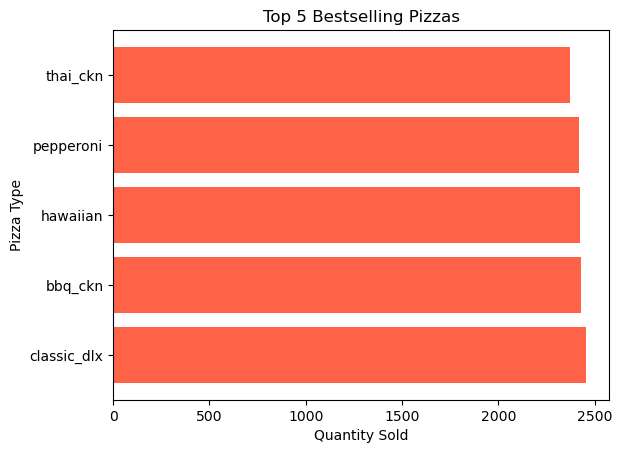

In [22]:
pizza_type_id = ['classic_dlx', 'bbq_ckn', 'hawaiian', 'pepperoni', 'thai_ckn'] # Define pizza types in correct order
top_5 = full_data.groupby("pizza_type_id")["quantity"].sum().reindex(pizza_type_id) # Group and reorder data
plt.barh(top_5.index, top_5.values, color="tomato") # plot
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza Type")

plt.show()

#### Insight: 
#### The top 5 pizzas that dominated the sales are bbq_ckn, hawaiian, pepperoni, thai_ckn, indicating customer favorites that drive most of the revenue.

## 9. Monthly sales trend 

In [23]:
monthly_sales = full_data.groupby(full_data['date'].dt.strftime('%B'))['revenue'].sum().reset_index()
monthly_sales.columns = ['month', 'total_revenue']
monthly_sales['month_num'] = pd.to_datetime(monthly_sales['month'], format='%B').dt.month # Add month number for sorting
monthly_sales = monthly_sales.sort_values('month_num') # Sort by month number

monthly_sales

,month,total_revenue,month_num
4,January,69793.30,1
3,February,65159.60,2
7,March,70397.10,3
0,April,68736.80,4
8,May,71402.75,5
6,June,68230.20,6
5,July,72557.90,7
1,August,68278.25,8
11,September,64180.05,9
10,October,64027.60,10


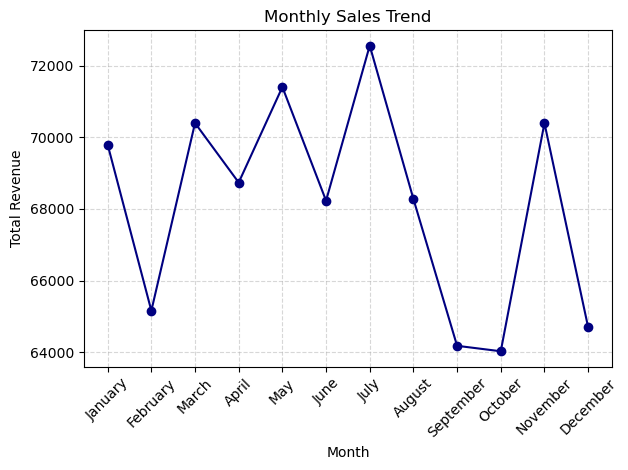

In [24]:
# Plot
plt.plot(monthly_sales['month'], monthly_sales['total_revenue'], color='navy', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

#### Insight: 

#### the monthly sales trend show moderate fluctuations, with peak in july. No clear rise toward year-end suggesting holidays may not significantly impact overall sales  

## 10.Least performing pizzas

In [25]:
low_5 = full_data.groupby("pizza_type_id")["quantity"].sum().sort_values().head(5).reset_index()

low_5

,pizza_type_id,quantity
0,brie_carre,490
1,mediterraneo,934
2,calabrese,937
3,spinach_supr,950
4,soppressata,961


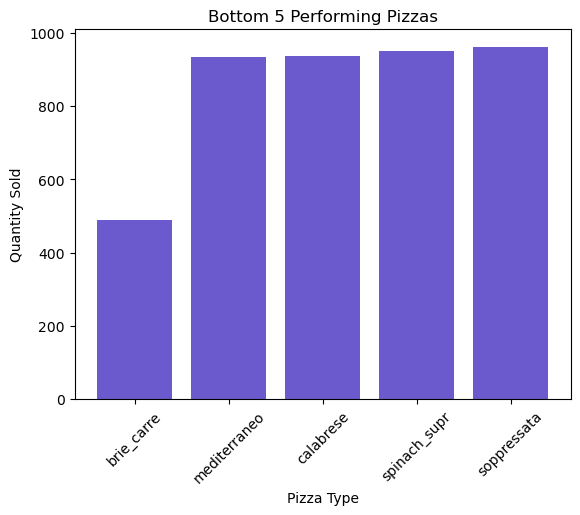

In [26]:
plt.bar(low_5['pizza_type_id'], low_5['quantity'], color='slateblue')
plt.title("Bottom 5 Performing Pizzas")
plt.xlabel("Pizza Type")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)

plt.show()

#### Insight: 

#### the brie_carre, mediterraneo, calabrese, spinach_supr and soppressata recorded the least performancing pizzas,suggesting they may be unpopular or need promotion.